In [1]:
import pandas as pd
pd.options.mode.chained_assignment = None  # default='warn'
import matplotlib.pyplot as plt
from pandas import DataFrame as df
import seaborn as sns
import numpy as np

In [2]:
cars=pd.read_csv("train-data.csv")
cars.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,Hyundai EON LPG Era Plus Option,Hyderabad,2012,75000,LPG,Manual,First,21.1 km/kg,814 CC,55.2 bhp,5.0,NaN,2.35
1,Maruti Omni E 8 Str STD,Hyderabad,2013,26875,Petrol,Manual,First,16.8 kmpl,796 CC,34.2 bhp,8.0,NaN,2.35
2,Volkswagen Polo Petrol Highline 1.2L,Kolkata,2011,50000,Petrol,Manual,First,16.47 kmpl,1198 CC,73.9 bhp,5.0,NaN,2.35
3,Maruti Alto 800 VXI,Kolkata,2015,11110,Petrol,Manual,First,22.74 kmpl,796 CC,47.3 bhp,5.0,NaN,2.35
4,Hyundai i10 Magna,Kolkata,2013,21000,Petrol,Manual,First,20.36 kmpl,1197 CC,78.9 bhp,5.0,NaN,2.35


In [3]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2675 entries, 0 to 2674
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               2675 non-null   object 
 1   Location           2675 non-null   object 
 2   Year               2675 non-null   int64  
 3   Kilometers_Driven  2675 non-null   int64  
 4   Fuel_Type          2675 non-null   object 
 5   Transmission       2675 non-null   object 
 6   Owner_Type         2675 non-null   object 
 7   Mileage            2675 non-null   object 
 8   Engine             2660 non-null   object 
 9   Power              2660 non-null   object 
 10  Seats              2658 non-null   float64
 11  New_Price          280 non-null    object 
 12  Price              2675 non-null   float64
dtypes: float64(2), int64(2), object(9)
memory usage: 271.8+ KB


In [4]:
cols=[col for col in cars.columns if(cars[col].isnull().sum()/cars.shape[0]*100<70 )]
cars_trimmed=cars[cols]

In [5]:
cars_trimmed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2675 entries, 0 to 2674
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               2675 non-null   object 
 1   Location           2675 non-null   object 
 2   Year               2675 non-null   int64  
 3   Kilometers_Driven  2675 non-null   int64  
 4   Fuel_Type          2675 non-null   object 
 5   Transmission       2675 non-null   object 
 6   Owner_Type         2675 non-null   object 
 7   Mileage            2675 non-null   object 
 8   Engine             2660 non-null   object 
 9   Power              2660 non-null   object 
 10  Seats              2658 non-null   float64
 11  Price              2675 non-null   float64
dtypes: float64(2), int64(2), object(8)
memory usage: 250.9+ KB


In [6]:
cars_trimmed.fillna(method='ffill',inplace=True)
cars_trimmed.isnull().sum()

Name                 0
Location             0
Year                 0
Kilometers_Driven    0
Fuel_Type            0
Transmission         0
Owner_Type           0
Mileage              0
Engine               0
Power                0
Seats                0
Price                0
dtype: int64

In [7]:
cars_trimmed['Mileage'] = pd.to_numeric(cars_trimmed['Mileage'].str.lower().str.split().str.get(0), errors='coerce')
cars_trimmed['Engine'] = pd.to_numeric(cars_trimmed['Engine'].str.lower().str.split().str.get(0), errors='coerce')
cars_trimmed['Power'] = pd.to_numeric(cars_trimmed['Power'].str.lower().str.split().str.get(0), errors='coerce')

In [8]:
cars_trimmed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2675 entries, 0 to 2674
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               2675 non-null   object 
 1   Location           2675 non-null   object 
 2   Year               2675 non-null   int64  
 3   Kilometers_Driven  2675 non-null   int64  
 4   Fuel_Type          2675 non-null   object 
 5   Transmission       2675 non-null   object 
 6   Owner_Type         2675 non-null   object 
 7   Mileage            2675 non-null   float64
 8   Engine             2675 non-null   int64  
 9   Power              2635 non-null   float64
 10  Seats              2675 non-null   float64
 11  Price              2675 non-null   float64
dtypes: float64(4), int64(3), object(5)
memory usage: 250.9+ KB


In [9]:
cars_trimmed['Name']=cars_trimmed['Name'].str.split(' ').str.slice(0,3).str.join(' ')


In [10]:
cars_trimmed = cars_trimmed.reset_index(drop=True)

In [11]:
cars_trimmed=cars_trimmed.drop(columns='Power')
cars_trimmed

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Seats,Price
0,Hyundai EON LPG,Hyderabad,2012,75000,LPG,Manual,First,21.10,814,5.0,2.35
1,Maruti Omni E,Hyderabad,2013,26875,Petrol,Manual,First,16.80,796,8.0,2.35
2,Volkswagen Polo Petrol,Kolkata,2011,50000,Petrol,Manual,First,16.47,1198,5.0,2.35
3,Maruti Alto 800,Kolkata,2015,11110,Petrol,Manual,First,22.74,796,5.0,2.35
4,Hyundai i10 Magna,Kolkata,2013,21000,Petrol,Manual,First,20.36,1197,5.0,2.35
...,...,...,...,...,...,...,...,...,...,...,...
2670,Hyundai Verna 1.6,Pune,2012,89000,Diesel,Manual,First,22.32,1582,5.0,6.00
2671,Nissan Terrano XL,Jaipur,2014,60000,Diesel,Manual,First,20.45,1461,5.0,6.00
2672,Volkswagen Vento 1.5,Hyderabad,2015,85000,Diesel,Manual,First,20.34,1498,5.0,6.00
2673,Renault Duster 85PS,Hyderabad,2013,74911,Diesel,Manual,First,20.45,1461,5.0,6.00


# Data Visualisation of the Various Features with labels

array([[<AxesSubplot:title={'center':'Year'}>,
        <AxesSubplot:title={'center':'Kilometers_Driven'}>],
       [<AxesSubplot:title={'center':'Mileage'}>,
        <AxesSubplot:title={'center':'Engine'}>],
       [<AxesSubplot:title={'center':'Seats'}>,
        <AxesSubplot:title={'center':'Price'}>]], dtype=object)

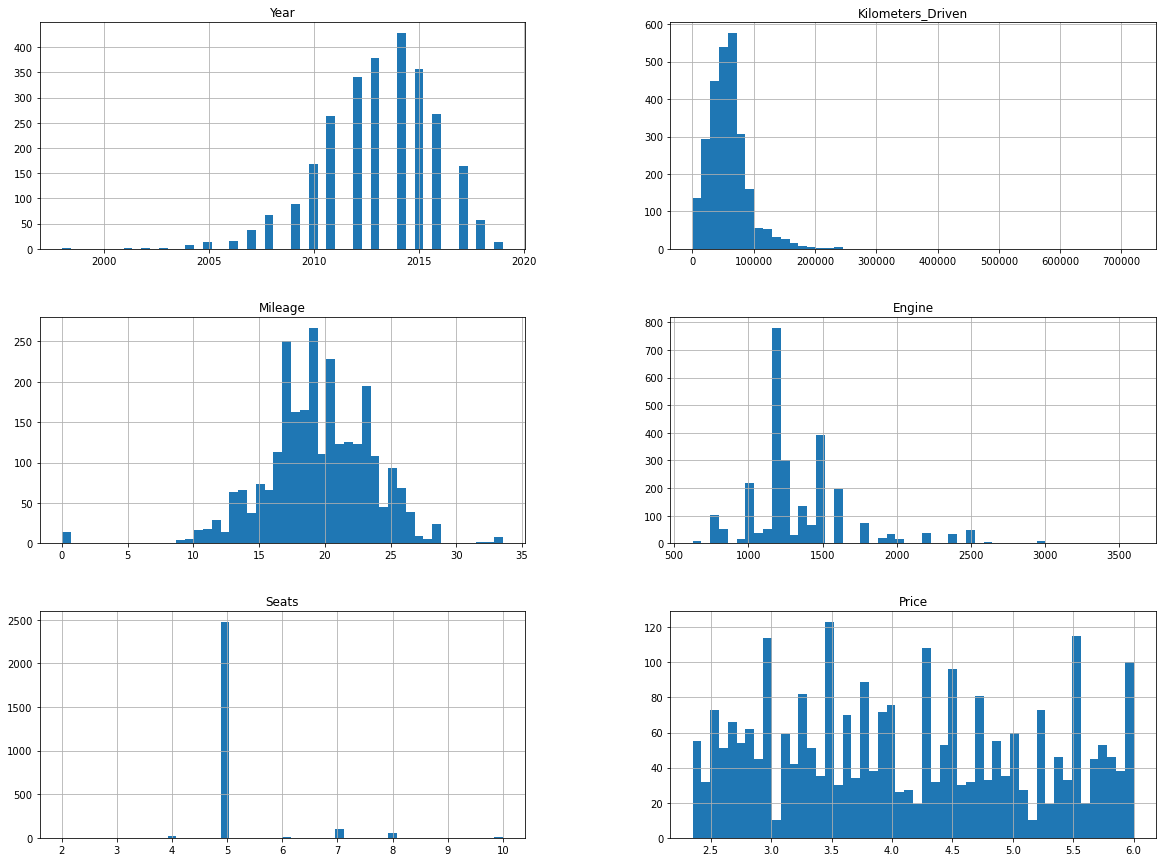

In [12]:
cars_trimmed.hist(bins=50,figsize=(20,15))

<AxesSubplot:title={'center':'Cars sold per company'}, xlabel='Company Name', ylabel='No. of cars sold'>

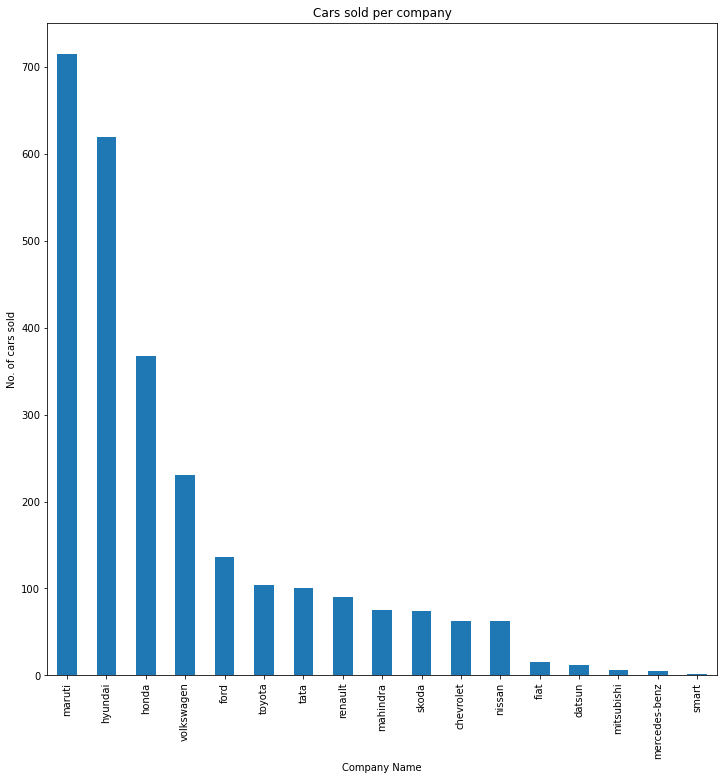

In [13]:
company_count=cars_trimmed['Name'].str.lower().str.split().str.get(0).to_frame()["Name"].value_counts()
plt.figure(figsize=(12,12))
plt.xlabel('Company Name')
plt.ylabel('No. of cars sold')
plt.title('Cars sold per company')
company_count.plot(kind='bar')

<AxesSubplot:title={'center':'Mileage v/s Fuel Type'}, xlabel='Fuel_Type', ylabel='Average Mileage'>

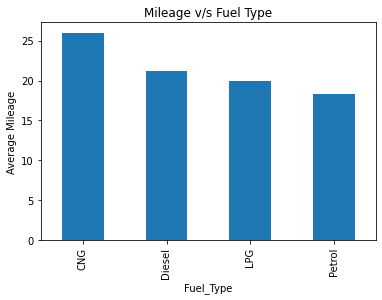

In [14]:
mileage = cars_trimmed.groupby('Fuel_Type').Mileage.mean()
plt.xlabel('Fuel Type')
plt.ylabel('Average Mileage')
plt.title('Mileage v/s Fuel Type')
mileage.plot(kind='bar')

In [15]:
comp = cars_trimmed['Name'].str.split().str.get(0)

cars_trimmed.insert(0, "Company", comp, True)


<AxesSubplot:title={'center':'Mileage v/s Company'}, xlabel='Company', ylabel='Average Mileage'>

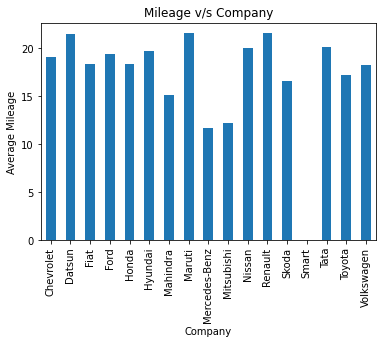

In [16]:
mileage_by_company = cars_trimmed.groupby('Company').Mileage.mean()
plt.xlabel('Company')
plt.ylabel('Average Mileage')
plt.title('Mileage v/s Company')
mileage_by_company.plot(kind='bar')

In [17]:
p = cars_trimmed.groupby('Company').Price.mean()
print(p)

Company
Chevrolet        3.444839
Datsun           3.115833
Fiat             3.661333
Ford             4.034485
Honda            4.259319
Hyundai          4.162468
Mahindra         4.388267
Maruti           3.990965
Mercedes-Benz    5.010000
Mitsubishi       4.046667
Nissan           4.117742
Renault          4.329000
Skoda            4.354324
Smart            3.000000
Tata             3.778614
Toyota           4.200000
Volkswagen       4.312522
Name: Price, dtype: float64


<AxesSubplot:title={'center':'Mileage v/s Company'}, xlabel='Company', ylabel='Price'>

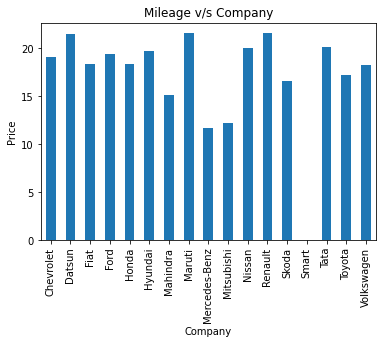

In [18]:
plt.xlabel('Company')
plt.ylabel('Price')
plt.title('Mileage v/s Company')
mileage_by_company.plot(kind='bar')

# Finding the Correlation

In [19]:
feat_analysis=cars_trimmed.drop(['Name', 'Company', 'Location', 'Fuel_Type', 'Transmission', 'Owner_Type'], axis = 1)
feat_analysis.corr()

,Year,Kilometers_Driven,Mileage,Engine,Seats,Price
Year,1.000000,-0.411373,0.479479,-0.536069,-0.205029,0.357629
Kilometers_Driven,-0.411373,1.000000,-0.124728,0.372266,0.207614,-0.072513
Mileage,0.479479,-0.124728,1.000000,-0.526820,-0.302353,0.025541
Engine,-0.536069,0.372266,-0.526820,1.000000,0.466313,0.209778
Seats,-0.205029,0.207614,-0.302353,0.466313,1.000000,0.092891
Price,0.357629,-0.072513,0.025541,0.209778,0.092891,1.000000


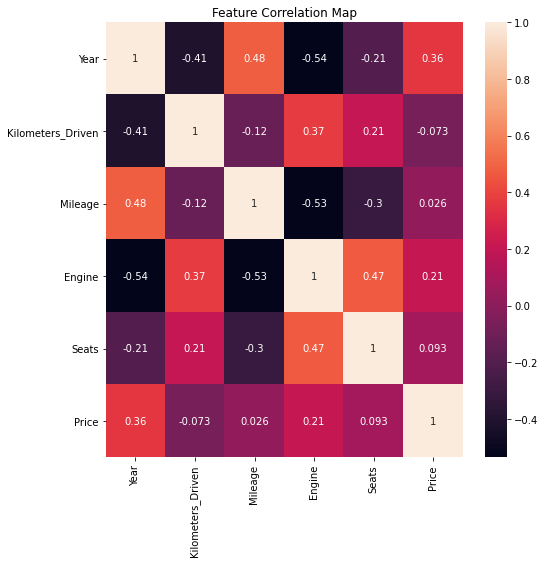

In [20]:

plt.figure(figsize=(8,8))
plt.title('Feature Correlation Map')
corrMatrix = feat_analysis.corr()
sns.heatmap(corrMatrix, annot=True)
plt.show()

In [21]:
X=cars_trimmed.drop(columns='Price')
y=cars_trimmed['Price']

# Building the Model

In [22]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)
from sklearn.linear_model import LinearRegression

from sklearn.metrics import r2_score

from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline
ohe=OneHotEncoder()




In [23]:
ohe.fit(X[['Name','Company','Location','Fuel_Type','Transmission','Owner_Type']])


OneHotEncoder()

In [24]:
column_trans=make_column_transformer((OneHotEncoder(categories=ohe.categories_),['Name','Company','Location','Fuel_Type','Transmission','Owner_Type']),remainder='passthrough')
lr=LinearRegression()
#lr=DecisionTreeRegressor()
#lr=RandomForestRegressor()
pipe=make_pipeline(column_trans,lr)

In [26]:
pipe.fit(X_train,y_train)
Y_pred=pipe.predict(X_test)

In [27]:
r2_score(y_test,Y_pred)

0.7028865959062855

# Choosing the Best Random State

In [28]:
scores=[]
for i in range(1000):
    X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=i)
    lr=LinearRegression()
    pipe=make_pipeline(column_trans,lr)
    pipe.fit(X_train,y_train)
    Y_pred=pipe.predict(X_test)
    scores.append(r2_score(y_test,Y_pred))
    


In [ ]:
scores[np.argmax(scores)]

# Using the best found random state for model building

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=np.argmax(scores))
lr=LinearRegression()
pipe=make_pipeline(column_trans,lr)
pipe.fit(X_train,y_train)
Y_pred=pip.predict(X_test)
r2_score(y_test,Y_pred)

# Predicting the Output of our model

In [ ]:
pipe.predict(pd.DataFrame([['Maruti','Maruti Alto 800', 'Kolkata', '2015','11110','Petrol','Manual','First','22.74','796','5']],columns=['Company','Name','Location','Year','Kilometers_Driven','Fuel_Type','Transmission','Owner_Type','Mileage','Engine','Seats']))
#pipe.predict(pd.DataFrame([['Hyundai','Hyundai i10 Magna','Kolkata','2013','21000','Petrol','Manual','First','20.36','1197','5']],columns=['Company','Name','Location','Year','Kilometers_Driven','Fuel_Type','Transmission','Owner_Type','Mileage','Engine','Seats']))